In [21]:
#assignment No:03

#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv("3.csv")

In [22]:
pima.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


In [43]:
pima.shape

(4238, 16)

In [23]:
#split dataset in features and target variable
feature_cols = ['age' ,'cigsPerDay', 'prevalentHyp', 'heartRate','totChol','sysBP','diaBP']
X = pima[feature_cols] # Features
y = pima.TenYearCHD # Target variable

In [24]:
# split X and y into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [35]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/home/exam/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[904,   4],
       [150,   2]])

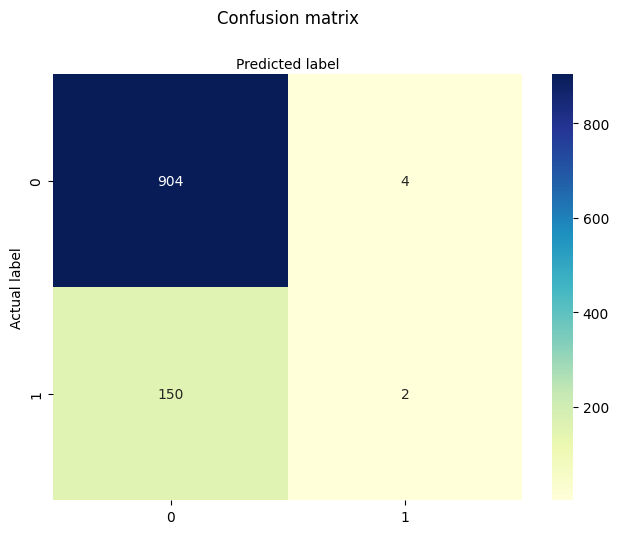

In [36]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  

class_names = [0, 1]  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
# Assuming cnf_matrix is defined elsewhere in your code
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', ax=ax)  # added ax=ax here
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [28]:
from sklearn.metrics import classification_report
target_names = ['without Heart Disease', 'with Heart Disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

without Heart Disease       0.86      1.00      0.92       908
   with Heart Disease       0.33      0.01      0.03       152

             accuracy                           0.85      1060
            macro avg       0.60      0.50      0.47      1060
         weighted avg       0.78      0.85      0.79      1060



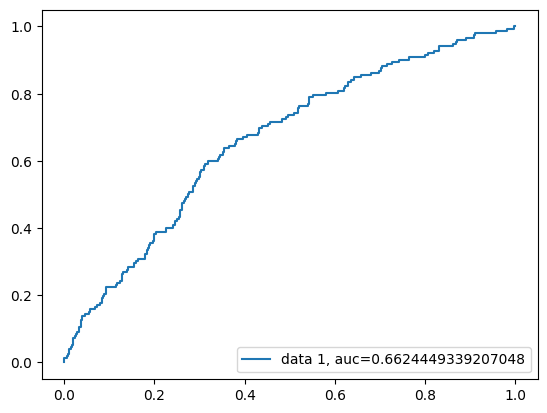

In [29]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

/tmp/ipykernel_18702/2098269442.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=pima, palette='hls')


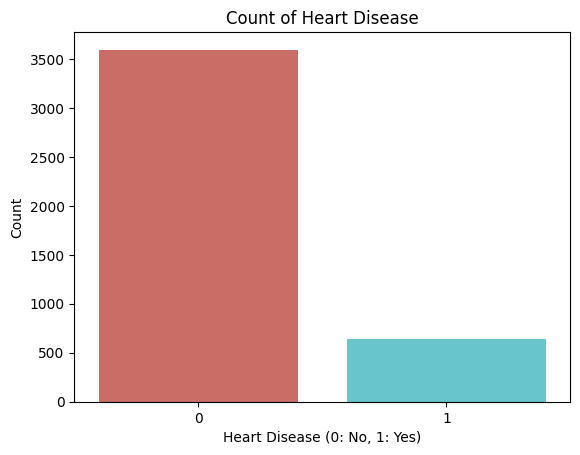

In [30]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  

# Plot count of 'TenYearCHD' column
sns.countplot(x='TenYearCHD', data=pima, palette='hls')
plt.title('Count of Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')

# Save the plot
plt.savefig('count_plot.png')

# Show plot
plt.show()
